# What makes people happy?


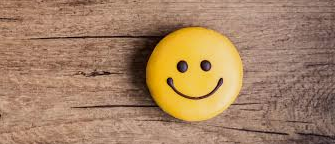

**Dataset information**
    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
import sys
sys.path.insert(0, '_functions_')

from Functions_EDA import *

In [4]:
import datetime

In [5]:
data = pd.read_csv("Ex2.2._Happiness-Score.csv")
data.shape

(312, 12)

# DATA CLEANING

## Dataset Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [6]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [7]:
data.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
Overall rank                      0
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy         305
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
year                              0
dtype: int64

In [8]:
data.shape

(312, 12)

## Modifying column names as needed

In [9]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


A. Dropping columns which has a least values

In [10]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Healthy life expectancy'], axis=1)

In [11]:
data = data.rename(columns={"year":"Year"})

In [12]:
data = data.rename(columns={"Overall rank":"Rank", "Country or region": "Country"})

In [13]:
df = data.copy()
df.head()

,Rank,Country,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


## - Dealing with Missing Values

A. Data Type check (used data.dtype)

 - 0   Rank                          312 non-null    int64           -->   Categorical / Nominal
 - 1   Country                       312 non-null    object          -->   Categorical / ordinal
 - 2   Score                         312 non-null    float64         -->   Numerical   / Discrete
 - 3   GDP per capita                312 non-null    float64         -->   Numerical   / Discrete
 - 4   Social support                312 non-null    float64         -->   Numerical   / Discrete
 - 5   Freedom to make life choices  312 non-null    float64         -->   Numerical   / Discrete
 - 6   Generosity                    312 non-null    float64         -->   Numerical   / Discrete
 - 7   Perceptions of corruption     311 non-null    float64         -->   Numerical   / Discrete
 - 8   Year                          312 non-null    int64           -->   Categorical / Ordinal
 
 <span style='background-color:#ffdce0'> Each variables have the correct data types :D </span>

B. Understanding situation of missing values

In [14]:
# The number of missing value by each row
df.isnull().sum()

Rank                            0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

In [15]:
# The number of duplicated rows
df.duplicated().sum()

0

In [16]:
# Percentage of missing value by each row
percentage_nullValues(df)

,Percentage_NaN
Perceptions of corruption,0.3
Rank,0.0
Country,0.0
Score,0.0
GDP per capita,0.0
Social support,0.0
Freedom to make life choices,0.0
Generosity,0.0
Year,0.0


C. Missing value corrections

In [17]:
df = fill_na(df) 

Number of missing values on your dataset are

Rank                            0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64


In [18]:
df.isnull().sum() # double check

Rank                            0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          312 non-null    int64  
 1   Country                       312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Freedom to make life choices  312 non-null    float64
 6   Generosity                    312 non-null    float64
 7   Perceptions of corruption     312 non-null    float64
 8   Year                          312 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 22.1+ KB


## - Outliers

In [20]:
df.columns

Index(['Rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [21]:
# Univariate variables
df_num = df.select_dtypes(include=['int64', 'float64'])

In [22]:
# Bivariate variables
df_cat = df.select_dtypes(include=['category', 'object'])

In [23]:
for i in df_num:
    OutLiersBox(df, i)

In [24]:
for i in df_cat:
    OutLiersBox(df, i)

Let's plot the distribution of 3 variables which have outliers 

In [25]:
df.skew()

Rank                            0.000000
Score                           0.013021
GDP per capita                 -0.298942
Social support                 -1.102203
Freedom to make life choices   -0.631564
Generosity                      0.803631
Perceptions of corruption       1.660554
Year                            0.000000
dtype: float64

Rank                            0.035491

Score                           0.006582

GDP per capita                 -0.317272 --> 0.5~-0.5 : approximately symmetric

Social support                 -0.786984 --> 0.5~-0.5 : approximately symmetric

Freedom to make life choices   -0.617416 --> 0.5~-0.5 : approximately symmetric

<span style='background-color:#ffdce0'>Generosity                      0.344001 --> btn abs(0.5~1), moderately skewed </span><br>
<span style='background-color:#ffdce0'>Perceptions of corruption       1.651280 --> Greater than1, the distribution is highly skewed </span><bf>
    
Year                            0.000000   

In [26]:
df=data.copy()

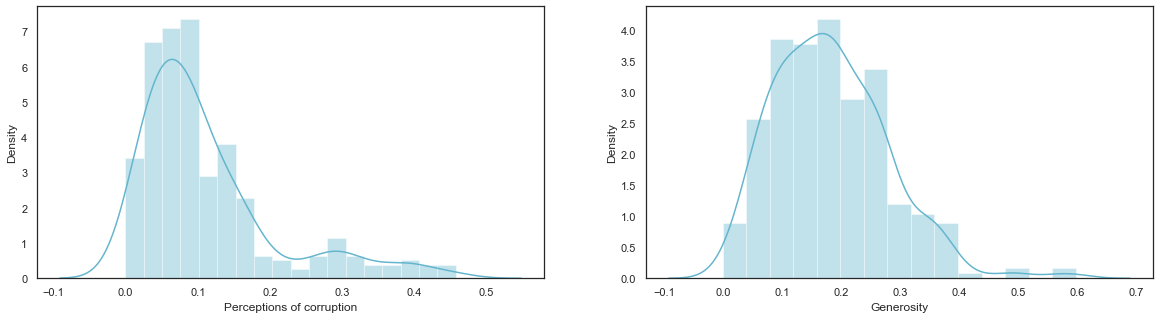

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(df['Perceptions of corruption'],color='c');

plt.subplot(122)
sns.distplot(df['Generosity'],color='c');

plt.savefig("before_removing_outlier.png")

2 variables have all skewed. Let's check the number of outliers

In [28]:
outlier_treatment(df, 'Perceptions of corruption')

Shape of the raw data: (312, 9)
..................
Shape of the cleaned data: (0, 9)


,Rank,Country,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year


<span style='background-color:#dcffe4'> Wow... :0</span>
<span style='background-color:#ffdce0'> The variable, Perceptions of corruption, has more than 20% from total rows. Decided to keep the outliers </span>

In [29]:
outlier_treatment(df, 'Generosity') # 다시

Shape of the raw data: (312, 9)
..................
Shape of the cleaned data: (308, 9)


,Rank,Country,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.555,0.217,0.411,2019
308,153,Tanzania,3.231,0.476,0.885,0.417,0.276,0.147,2019
309,154,Afghanistan,3.203,0.350,0.517,0.000,0.158,0.025,2019
310,155,Central African Republic,3.083,0.026,0.000,0.225,0.235,0.035,2019


<span style='background-color:#ffdce0'> The number of removed rows are less than 20%. Decided to remove the outliers </span>

Just for fun, let try to remove the outliers :P

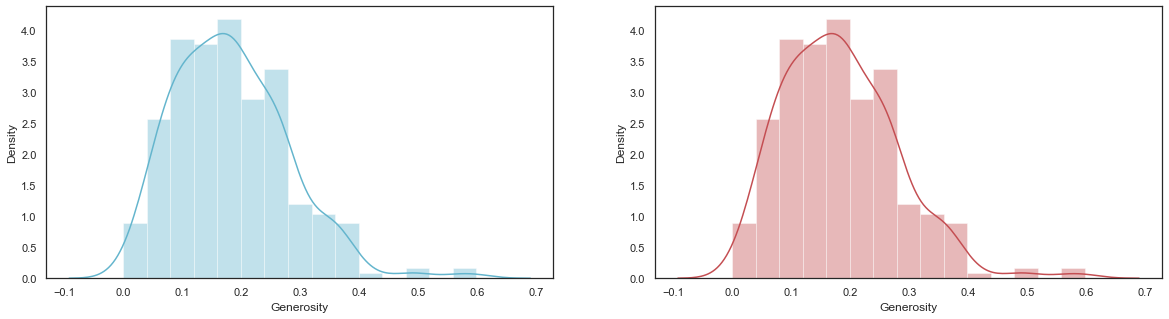

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(data['Generosity'],color='c');
plt.subplot(122)
sns.distplot(df['Generosity'],color='r');

Okay, Not much difference. Make sense :)
<span style='background-color:#dcffe4'> Okay. Clean data is ready. Let's move on for EDA!!</span>

## - Catogorize the values

To see the big picture of variables, 2 numerical variables, Rank and GDP, can be converted to categorical variables

A) Rank - sperating Top 50% and Bottom 50%

In [31]:
df3 = df.copy()

In [32]:
top_rank = df3.loc[(df3['Rank']<=78)]
top_rank['rank_cat'] = 'Top'

bottom_rank = df3.loc[df3['Rank']>78]
bottom_rank['rank_cat'] = 'Bottom'

In [33]:
df3 = pd.concat([top_rank, bottom_rank], sort=False)

B) GDP -  sperating Top 50% and Bottom 50% in each year

In [34]:

t18 = df3.loc[df3['Year']==2018].sort_values(by='GDP per capita', ascending=False).head(78)
t18['GDP_cat']='Top 50%'
b18 = df3.loc[df3['Year']==2018].sort_values(by='GDP per capita', ascending=False).tail(78)
b18['GDP_cat']='Bottom 50%'


t19 = df3.loc[df3['Year']==2019].sort_values(by='GDP per capita', ascending=False).head(78)
t19['GDP_cat']='Top 50%'
b19 = df3.loc[df3['Year']==2019].sort_values(by='GDP per capita', ascending=False).tail(78)
b19['GDP_cat']='Bottom 50%'


In [35]:
df3 = pd.concat([t18, b18, t19, b19], sort=False)

I need a new algorithm which converts numerical data to categorical data... :(

In [36]:
df3.head()

,Rank,Country,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year,rank_cat,GDP_cat
19,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018,Top,Top 50%
31,32,Qatar,6.374,1.649,1.303,0.654,0.256,0.171,2018,Top,Top 50%
16,17,Luxembourg,6.910,1.576,1.520,0.632,0.196,0.321,2018,Top,Top 50%
33,34,Singapore,6.343,1.529,1.451,0.631,0.261,0.457,2018,Top,Top 50%
44,45,Kuwait,6.083,1.474,1.301,0.554,0.167,0.106,2018,Top,Top 50%


# EDA and Visualization 

## - Ideation

Comparing two years' score

In [37]:
fig = px.box(df3,x="Year", y="Score", color="GDP_cat",
            color_discrete_sequence = ['goldenrod', 'lawngreen'], title = 'Comparison between Top 50% and Bottom 50%')
fig.show()

It looks there is not much different in the variable, Score for 2 years. 

Then, Let's Check the relationships among each variables with a heatamp to see correlation

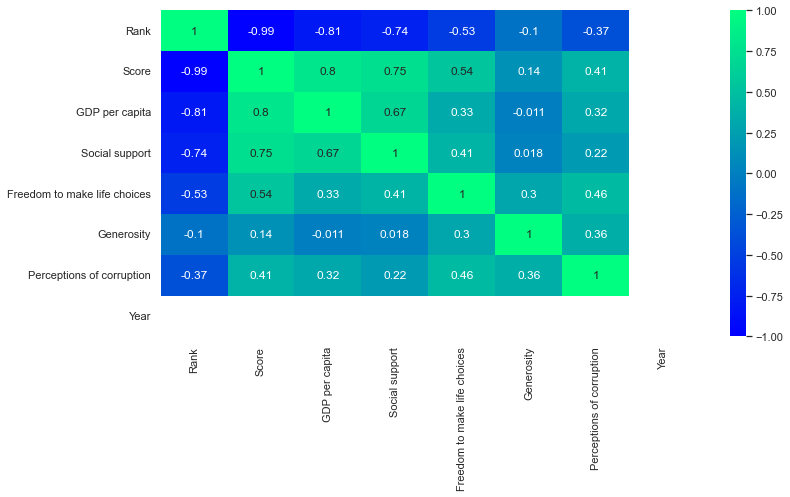

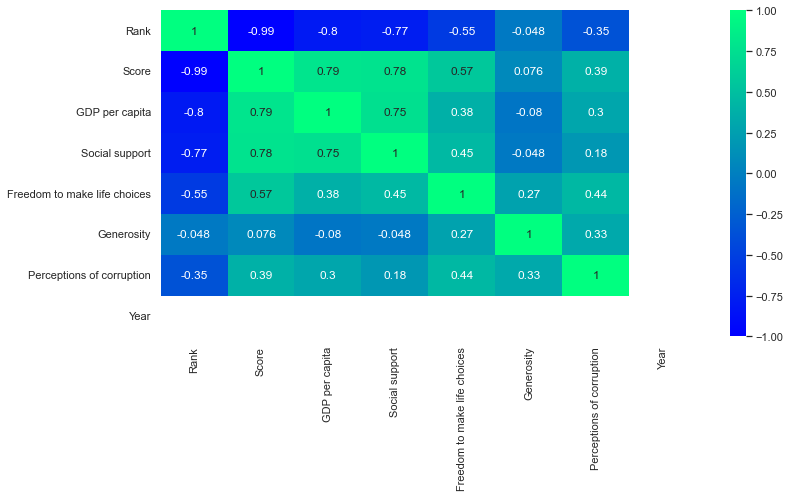

<Figure size 432x288 with 0 Axes>

In [38]:
df_18 = df.loc[df['Year']==2018,:]
df_19 = df.loc[df['Year']==2019,:]

plt.figure(figsize=(12,6))
sns.heatmap(df_18.corr(), vmax=1, vmin=-1, annot=True, center=0, cmap='winter' )
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df_19.corr(), vmax=1, vmin=-1, annot=True, center=0, cmap='winter' )
plt.show()

plt.savefig('heat_map_2018') #for matplotlib

3 factors are chosen, 'GDP per capita', 'Social support', 'Freedome to make life choices' by the correlation heatmap. 

## 1. What factor has bigger relation with the variable, Score in 2018?

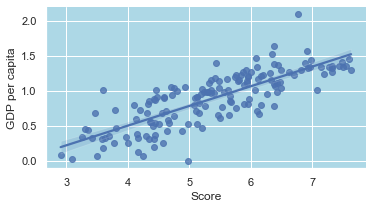

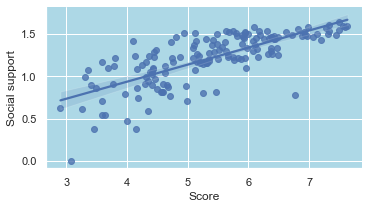

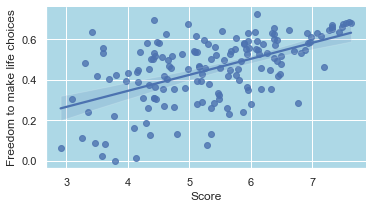

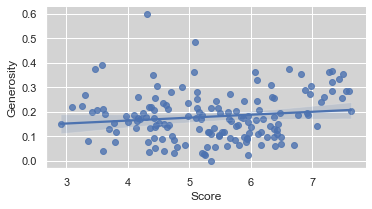

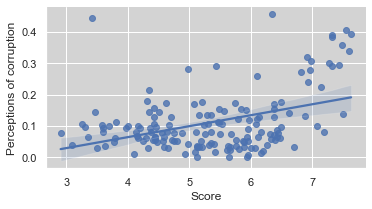

<Figure size 432x288 with 0 Axes>

In [39]:
sns.set(rc={'axes.facecolor':'lightblue'})
sns.lmplot(y='GDP per capita', x="Score", height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightblue'})
sns.lmplot(y='Social support', x="Score", height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightblue'})
sns.lmplot(y='Freedom to make life choices', x="Score", height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightgray'})
sns.lmplot(y='Generosity', x="Score", height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightgray'})
sns.lmplot(y='Perceptions of corruption', x="Score", height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

plt.savefig("lmplot_5 variables.png")

By lmplot, we can focus on only 3 variables to investigate. 

- 'Social support'<br>
- 'GDP per capita',<br>
- 'Freedom to make life choices'<br>

These 3 fators has stronger relation with score. 
As score get higher, those variables also get higher. 

<span style='background-color:#ffdce0'> 
Then, Which variable give more impact to the score? </span>

## 2. How about relation by 3 main factors in 2018?

Comparing 3 variables, GDP and social support have shown the most decilined graph.
Let's try to see in differnt chart as following. 

by lmplot, we found that there are main

In [40]:
fig = px.scatter(df_18, y='Social support', size='GDP per capita',
                 color='Freedom to make life choices',
                 x='Rank',size_max=30, title='Relation of Rank and 3 main factors in 2018')
fig.show()

Higher rank are mostly located at the most left-high with big size of bubble. <br>
Also, on lmplot, we can see that GDP has shown the most declined graph as following. 

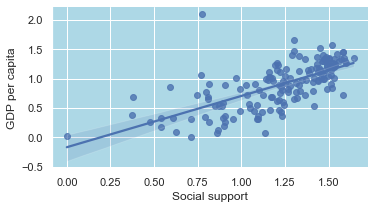

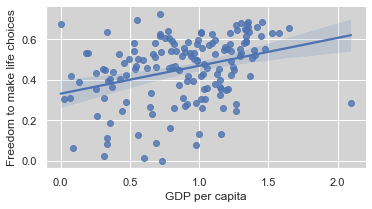

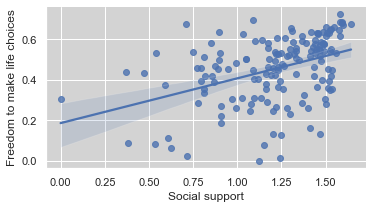

In [41]:
sns.set(rc={'axes.facecolor':'lightblue'})
sns.lmplot(y='GDP per capita', x='Social support', height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightgray'})
sns.lmplot(y='Freedom to make life choices', x='GDP per capita', height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()

sns.set(rc={'axes.facecolor':'lightgray'})
sns.lmplot(x='Social support', y='Freedom to make life choices', height=8, data=df_18)
plt.gcf().set_size_inches(5, 2.5)
plt.show()



Then, Top rank 10 countries have high value of GDP per capita in deed?

In [42]:
gdp_list=[]

print('[Diff of GDP per capita]')
top_10_gdp = df_18[df_18['Rank']<=10]['GDP per capita'].mean()
gdp_list.append(top_10_gdp)

bottom_10_gdp = df_18[df_18['Rank']>148]['GDP per capita'].mean()
gdp_list.append(bottom_10_gdp)

print("The mean of 10 highest rank countries :",top_10_gdp,2)
print("The mean of 10 lowest rank countries :",bottom_10_gdp)
print("The Gap of each mean value :",round(top_10_gdp-bottom_10_gdp,2))
gdp_list.append(round(top_10_gdp-bottom_10_gdp,2))


print('\n')
print('[Diff of social support]')

ss_list = []

top_10_ss = df_18[df_18['Rank']<=10]['Social support'].mean()
bottom_10_ss = df_18[df_18['Rank']>148]['Social support'].mean()
ss_list.append(top_10_ss)
ss_list.append(bottom_10_ss)
print("The mean of 10 highest rank countries :",top_10_ss,2)
print("The mean of 10 lowest rank countries :",bottom_10_ss)
print("The Gap of each mean value :", round(top_10_ss-bottom_10_ss))
ss_list.append(round(top_10_ss-bottom_10_ss))

compare = pd.DataFrame({'Diff of GDP per capita':gdp_list,'Diff of social support':ss_list })
compare['title']=['Top 10', 'Bottom 10', 'Diff']
compare.index=compare['title']
compare.drop(['title'], axis=1)

[Diff of GDP per capita]
The mean of 10 highest rank countries : 1.3529000000000002 2
The mean of 10 lowest rank countries : 0.30575
The Gap of each mean value : 1.05


[Diff of social support]
The mean of 10 highest rank countries : 1.5652 2
The mean of 10 lowest rank countries : 0.679375
The Gap of each mean value : 1


,Diff of GDP per capita,Diff of social support
title,,
Top 10,1.35290,1.565200
Bottom 10,0.30575,0.679375
Diff,1.05000,1.000000


In [43]:
colors= ['midnightblue','turquoise']


fig = px.bar(compare.iloc[0:2,:], x = 'title', 
                 y = ['Diff of GDP per capita','Diff of social support' ], 
                 color_discrete_sequence=colors)

fig.update_layout(barmode='group')

fig.show()

# Conclusion

<span style='background-color:#dcffe4'> 
    There are 3 factors which helps peole feel more happy like 'Social support','GDP per capita','Freedom to make life choices'. 
    Among them, <span style='background-color:#ffdce0'> GDP per capita</span> appears outstanding in several graph.
</span>

and... Just for fun...Let's compare the contires by continent

In [44]:
df_terr = pd.read_csv('df2.csv')
df_terr =df_terr.drop(['Unnamed: 0'], axis=1)

In [45]:
terr_score=df_terr.groupby('Territory')['Score'].agg(['count','mean'])
terr_score = terr_score.reset_index()
terr_score = terr_score.sort_values(by='mean', ascending=False)
terr_score

,Territory,count,mean
5,Oceania,4,7.282750
4,North America,6,6.911167
3,European Union,58,6.331293
7,South America,20,5.949950
2,Central America and Caribbean,21,5.898286
6,Rest of Europe,32,5.727000
1,Asia,82,5.279329
0,Africa,89,4.329270


In [46]:
fig = px.bar(terr_score,x='Territory', y='mean', color_discrete_sequence=['tomato'])
fig.update_layout(title_text = 'Total of scores by continents')
fig.show()